<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0221ENSkillsNetwork899-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# Peer Review Assignment - Data Engineer - ETL


Estimated time needed: **20** minutes


## Objectives

In this final part you will:

- Run the ETL process
- Extract bank and market cap data from the JSON file `bank_market_cap.json`
- Transform the market cap currency using the exchange rate data
- Load the transformed data into a seperate CSV


For this lab, we are going to be using Python and several Python libraries. Some of these libraries might be installed in your lab environment or in SN Labs. Others may need to be installed by you. The cells below will install these libraries when executed.


In [ ]:
#!mamba install pandas==1.3.3 -y
#!mamba install requests==2.26.0 -y

## Imports

Import any additional libraries you may need here.


In [ ]:
import glob
import pandas as pd
from datetime import datetime

As the exchange rate fluctuates, we will download the same dataset to make marking simpler. This will be in the same format as the dataset you used in the last section  


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0221EN-SkillsNetwork/labs/module%206/Lab%20-%20Extract%20Transform%20Load/data/bank_market_cap_1.json
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0221EN-SkillsNetwork/labs/module%206/Lab%20-%20Extract%20Transform%20Load/data/bank_market_cap_2.json
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0221EN-SkillsNetwork/labs/module%206/Final%20Assignment/exchange_rates.csv

## Extract


### JSON Extract Function

This function will extract JSON files.


In [ ]:
def extract_from_json(file_to_process):
    dataframe = pd.read_json(file_to_process)
    return dataframe

## Extract Function

Define the extract function that finds JSON file `bank_market_cap_1.json` and calls the function created above to extract data from them. Store the data in a `pandas` dataframe. Use the following list for the columns.


In [ ]:
columns=['Name','Market Cap (US$ Billion)']

In [ ]:
def extract():
    # Write your code here
    extracted_data = pd.DataFrame(columns=['Name','Market Cap (US$ Billion)'])
    extracted_data = extracted_data._append(extract_from_json('bank_market_cap_1.json'), ignore_index=True)

<b>Question 1</b> Load the file <code>exchange_rates.csv</code> as a dataframe and find the exchange rate for British pounds with the symbol <code>GBP</code>, store it in the variable  <code>exchange_rate</code>, you will be asked for the number. Hint: set the parameter  <code>index_col</code> to 0.


In [ ]:
# Write your code here
def read_exchangeRate():
    df = pd.read_csv("exchange_rates.csv", index_col=0)
    exchange_rate = df.loc['GBP'].loc['Rates'] 
    return exchange_rate
print(read_exchangeRate())

## Transform

Using <code>exchange_rate</code> and the `exchange_rates.csv` file find the exchange rate of USD to GBP. Write a transform function that

1. Changes the `Market Cap (US$ Billion)` column from USD to GBP
2. Rounds the Market Cap (US$ Billion)` column to 3 decimal places
3. Rename `Market Cap (US$ Billion)` to `Market Cap (GBP$ Billion)`


In [ ]:
def transform(data):
    data['Market Cap (US$ Billion)'] = round(data['Market Cap (US$ Billion)'] * read_exchangeRate(), 3)
    data.rename(columns = {'Market Cap (US$ Billion)':'Market Cap (GBP$ Billion)'}, inplace = True)
    return data

## Load

Create a function that takes a dataframe and load it to a csv named `bank_market_cap_gbp.csv`. Make sure to set `index` to `False`.


In [ ]:
def load(targetfile,data_to_load):
    data_to_load.to_csv(targetfile)
    

## Logging Function


Write the logging function <code>log</code> to log your data:


In [ ]:
def log(message):
    timestamp_format = '%Y-%h-%d-%H:%M:%S'
    now = datetime.now()
    timestamp = now.strftime(timestamp_format)
    with open("logfile.txt","a") as f:
        f.write(timestamp + ',' + message + '\n')

## Running the ETL Process


Log the process accordingly using the following <code>"ETL Job Started"</code> and <code>"Extract phase Started"</code>


In [ ]:
# Write your code here
log("ETL Job Started")
log("Extract phase Started")

### Extract


<code>Question 2</code> Use the function <code>extract</code>, and print the first 5 rows, take a screen shot:


In [ ]:
extracted_data = extract()
print(extracted_data.head())

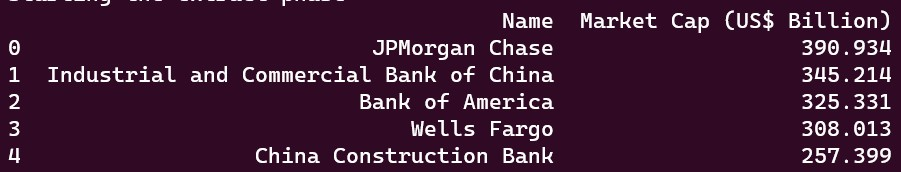

Log the data as <code>"Extract phase Ended"</code>


In [ ]:
# Write your code here
etl.log("Extract phase Ended")

### Transform


Log the following  <code>"Transform phase Started"</code>


In [ ]:
# Write your code here
log("Transform phase Started")

<code>Question 3</code> Use the function <code>transform</code> and print the first 5 rows of the output, take a screen shot:


In [ ]:
# Call the function here
transformed_data = transform(extracted_data)
# Print the first 5 rows here
print(transformed_data.head())

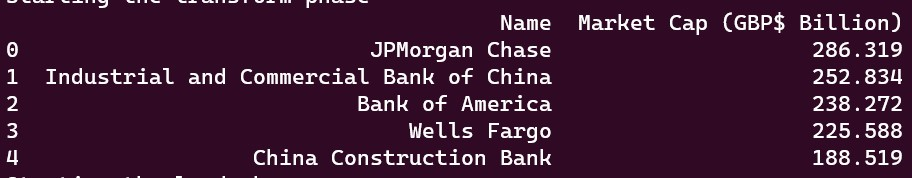

Log your data <code>"Transform phase Ended"</code>


In [ ]:
# Write your code here
log("Transform phase Ended")

### Load


Log the following `"Load phase Started"`.


In [ ]:
# Write your code here
log("Load phase Started")

Call the load function


In [ ]:
# Write your code here
load("transformed_data.csv",transformed_data)

Log the following `"Load phase Ended"`.


In [ ]:
# Write your code here
log("Load phase Ended")

## Authors


Ramesh Sannareddy, Joseph Santrcangelo and Azim Hirjani


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-11-25        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0221ENSkillsNetwork899-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
